In [1]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install imgaug

# Augmentation


In [ ]:
import os
import numpy as np
import imgaug.augmenters as iaa
from PIL import Image

def augment_images_in_subdirectories(root_dir):
  # List of available augmentation techniques
  augmentation_techniques = [
      iaa.GaussianBlur(sigma=(0.0, 0.8)),  # Increased blur
      iaa.AdditiveGaussianNoise(scale=(0.0, 0.05 * 255)),
      iaa.Affine(rotate=(-10, 10)),  # Increased rotation
      iaa.Multiply((0.7, 1.3)),  # Increased brightness
      iaa.ContrastNormalization((0.7, 1.3)),  # Increased contrast
      iaa.Sometimes(0.8, iaa.Crop(percent=(0, 0.2))),  # Increased crop
      iaa.Sometimes(0.5, iaa.PerspectiveTransform(scale=(0.01, 0.1))),
      iaa.Sometimes(0.5, iaa.ElasticTransformation(alpha=(0.7, 3.0), sigma=0.1)),  # Increased elastic deformation
      iaa.Resize({"height": (0.9, 1.1), "width": (0.9, 1.1)}),
      iaa.Resize({"height": (0.85, 1.2), "width": (0.8, 1.3)}),# Slightly increased random resizing
      iaa.Grayscale(alpha=(0.0, 0.5))  # Reduced chance of grayscale
  ]

  # Iterate through subdirectories
  for consultant_folder in os.listdir(root_dir):
    consultant_dir = os.path.join(root_dir, consultant_folder)

    # Check if it's a directory
    if os.path.isdir(consultant_dir):
      # List of image filenames in the subdirectory
      image_filenames = [filename for filename in os.listdir(consultant_dir) if filename.lower().endswith(('.jpg', '.png', '.jpeg'))]

      # Determine the number of augmentations per image based on the number of images
      if len(image_filenames) < 10:
        num_augmentations = 6
      else:
        num_augmentations = 2

      # Iterate through images in the subdirectory
      for image_filename in image_filenames:
        image_path = os.path.join(consultant_dir, image_filename)
        img = Image.open(image_path)

        # Apply the chosen number of augmentations per image
        for i in range(num_augmentations):
          # Randomly select an augmentation technique
          chosen_augmentation = np.random.choice(augmentation_techniques)

          # Apply the chosen augmentation
          augmented_img = chosen_augmentation.augment_image(np.array(img))

          # Save the augmented image in the same folder with the specified naming convention
          output_filename = os.path.splitext(image_filename)[0] + "_augmented_" + str(i + 1) + os.path.splitext(image_filename)[1]
          output_path = os.path.join(consultant_dir, output_filename) #consultant_dir

          Image.fromarray(augmented_img).save(output_path)
      print(f"Augmentation done: {consultant_dir}")


# Example usage
root_directory = "/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation"
augment_images_in_subdirectories(root_directory)


Augmentation done: /content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/vt_consulting
Augmentation done: /content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/wga
Augmentation done: /content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/volcon
Augmentation done: /content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/wsp.jpg
Augmentation done: /content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/zzz_unknowns_not_consultants
Augmentation done: /content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/westera_partners.jpg
Augmentation done: /content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/wright_design.jpg
Augmentation done: /content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/van_der_meer
Augmentation d

In [ ]:
sum=0
for folders in os.listdir("/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation"):
  sum=sum+len(os.listdir(os.path.join('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation',folders)))

In [ ]:
sum

39709

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# Split files into anchor positives and negatives
Augment before splitting

split consultant logo files into anchor pos and neg

before:

  **root_dir:**
  ->consultant_1_images
  ->consultant_2_images
  ->consultant_n_images
  ->negative_images/unknown/non-consultants

after:

  **root_dir:**
  ->consultant_1_images(anchor, positive, negative)
  ->consultant_2_images(anchor, positive, negative)
  ->consultant_n_images(anchor, positive, negative)
  ->negative_images/unknown/non-consultants // can skip this folder for anchor pos and negative


In [ ]:
import os
consultant_images_path=list()
# all negative images non-consultants
for image in os.listdir('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/zzz_unknowns_not_consultants'):
    consultant_images_path.append(os.path.join('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/zzz_unknowns_not_consultants',image))

In [ ]:
import os
import random
import shutil
import numpy as np
os.path.exists(np.random.choice(consultant_images_path)) , len(consultant_images_path)

(True, 18696)

In [ ]:
root_dir = '/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation'
consultant_folders = [folder for folder in os.listdir(root_dir)]
consultant_folders

['vt_consulting',
 'wga',
 'volcon',
 'wsp.jpg',
 'zzz_unknowns_not_consultants',
 'westera_partners.jpg',
 'wright_design.jpg',
 'van_der_meer',
 'woolacotts.jpg',
 'wood_and_grieve_engineers',
 'terpkos',
 'structure_studio',
 'ttw',
 'triaxial.jpg',
 'tungsten',
 'stp.jpg',
 'structplan',
 'structa',
 'structural_arts',
 'tonkin.jpg',
 'sheehy.jpg',
 'scg',
 'rmg',
 'sticksstones.jpg',
 'roofbrook.jpg',
 'sia_structural',
 'robert_bird_group.jpg',
 'stantec.jpg',
 'rma.jpg',
 'sge.jpg',
 'rba.jpg',
 'peter_lucena',
 'projects_and_designs.jpg',
 'Pritchard.jpg',
 'parkhill_freeman',
 'pt_design.jpg',
 'richmond_ross',
 'push_tod',
 'patcol.jpg',
 'reid.jpg',
 'northrop.jpg',
 'olia',
 'opus',
 'northey_consulting_engineers',
 'ops_engineers',
 'oska.jpg',
 'optimum_structures.jpg',
 'naxos',
 'northern_consulting_engineers',
 'odyssey',
 'motus.jpg',
 'mlei.jpg',
 'mott_mcdonald',
 'nastasi',
 'mrc',
 'morgan_consulting_engineers.jpg',
 'mpn.jpg',
 'mpc.jpg',
 'myd',
 'MRM',
 'milano

In [ ]:
# entry=os.scandir(root_dir)
# entry
for entry in os.scandir(root_dir):
  print(entry.path)

/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/vt_consulting
/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/wga
/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/volcon
/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/wsp.jpg
/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/zzz_unknowns_not_consultants
/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/westera_partners.jpg
/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/wright_design.jpg
/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/van_der_meer
/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation/woolacotts.jpg
/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog

In [ ]:
done=[]

In [ ]:
len(done)

112

In [ ]:
import os
import random
import shutil
# wga
# volcon

# Define the number of negative images per consultant
# num_negative_images = 10  # Adjust as needed

for consultant_folder in consultant_folders:

    # if (consultant_folder != 'zzz_unknowns_not_consultants' and consultant_folder != 'vt_consulting') and (consultant_folder != 'volcon' and consultant_folder != 'wga'): # after first iterration check if everything is working then remove break  and add first ele consultant_folder != 'vt_consulting' in this line
    if (consultant_folder not in done) and (consultant_folder != 'zzz_unknowns_not_consultants'):
        print(consultant_folder)
        consultant_dir = os.path.join(root_dir, consultant_folder)
        anchor_dir = os.path.join(consultant_dir, 'anchor')
        positive_dir = os.path.join(consultant_dir, 'positive')
        negative_dir = os.path.join(consultant_dir, 'negative')

        # Create subfolders if they don't exist
        os.makedirs(anchor_dir, exist_ok=True)
        os.makedirs(positive_dir, exist_ok=True)
        os.makedirs(negative_dir, exist_ok=True)

        # List all images in the consultant's folder
        consultant_images = [image for image in os.listdir(consultant_dir) if image.endswith('.jpg')]

        # Randomly shuffle the list of images
        random.shuffle(consultant_images)

        # Determine the number of images for anchor and positive folders
        num_anchor_images = (len(consultant_images) // 2 )-1
        num_positive_images = (len(consultant_images) - num_anchor_images)

        # Copy or copy images to anchor and positive folders
        for i in range(len(consultant_images)):
            if i < num_anchor_images:
                # Use the first half of images as anchor
                shutil.move(os.path.join(consultant_dir, consultant_images[i]), anchor_dir)

                # print("anchor:::",end=" ")
                # print(os.path.join(consultant_dir, consultant_images[i]), anchor_dir)
            else:
                # Use the second half as positive
                shutil.move(os.path.join(consultant_dir, consultant_images[i]), positive_dir)

                # print("pos:::",end=" ")
                # print(os.path.join(consultant_dir, consultant_images[i]), positive_dir)

        num_negative_images=(len(os.listdir(os.path.join(consultant_dir, anchor_dir))))+10
        # Copy or copy random images from other consultants to create negative examples

        # for folder in consultant_folders:
        #     consultant_images_path=consultant_images_path+os.listdir(os.path.join(root,folder))
        # new_consultant_images_path=[]
        # for folder in consultant_folders:
        #     if  folder != consultant_folder and folder != 'zzz_unknowns_not_consultants':
        #         count=0
        #         for image in os.listdir(os.path.join(root_dir,folder)):
        #             if (image !='anchor' and image!='positive') and image!='negative':
        #                 new_consultant_images_path.append(os.path.join(root_dir,folder,image))
        #                 # new_consultant_images_path=new_consultant_images_path+consultant_images_path
        #                 if count==7:
        #                     break
        #                 else:
        #                     count=count+1


        new_consultant_images_path = []

        for folder in consultant_folders:
            if folder == consultant_folder or folder == 'zzz_unknowns_not_consultants':
                continue  # Skip the current consultant's folder and 'zzz_unknowns_not_consultants' folder

            count = 0
            folder_path = os.path.join(root_dir, folder)

            for entry in os.scandir(folder_path):
                if entry.is_file() and entry.name not in {'anchor', 'positive', 'negative'}:
                    new_consultant_images_path.append(entry.path)
                    count += 1

                    if count == 7:
                        break  # Limit to collecting 7 images per folder

        if len(new_consultant_images_path)>num_negative_images:
            new_consultant_images_path=random.sample(new_consultant_images_path,num_negative_images)+random.sample(consultant_images_path,(num_negative_images//3))
        else:
            new_consultant_images_path=new_consultant_images_path+random.sample(consultant_images_path,(num_negative_images))
        random.shuffle(new_consultant_images_path)

        for i in range(num_negative_images):

            # print(len(consultant_images_path))
            # print(random.choice(consultant_images_path))
            # print(len(new_consultant_images_path))

            random_image = random.choice(new_consultant_images_path)
            shutil.copy(random_image, negative_dir)
            new_consultant_images_path.remove(random_image)
            # print("neg:::",end=" ")
            # print(random_image, negative_dir)
        # print(len(new_consultant_images_path))


print("Dataset folders created successfully.")


bligh_tanner.jpg
chris_brown
costin_roe_consulting
bmce
capitalhouse_autralasia
bg_group_engineers
calibre_1.jpg
bornhorst_ward.jpg
BEC_engineered_design_and_management
bce
aurecon
amkad_group
bellas_reitano
alta_projects.jpg
avant
bdd
barllow_shelley
bg_and_e
aecom
advanced_structural_design.jpg
adams.jpg
acor_consultants.jpg
adg_1.jpg
Dataset folders created successfully.


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


# Dependencies and Making tf dataset





In [ ]:
!pip install tensorflow #==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib

In [2]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.models import Model # used as ---> Model(inputs=[inputimg , compareimg] , outputs=[1,0]# same or not)
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [ ]:
# gpus= tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#   tf.config.experimental.set_memory_growth(gpu,True)

In [ ]:
def make_dataset(anchor_path,positive_path,negative_path):


  def preprocess(img_path):
    byte_img=tf.io.read_file(img_path)
    img=tf.io.decode_jpeg(byte_img)
    img=tf.image.resize(img,(105,105))
    img=img/255.0
    return img

  def preprocess_twins(input_img,given_img,label):
    return ( preprocess(input_img),preprocess(given_img) ,label)

  val=len(os.listdir(anchor_path))

  anchor=tf.data.Dataset.list_files(anchor_path+'/*.jpg').take(val)
  positive=tf.data.Dataset.list_files(positive_path+'/*.jpg').take(val)
  negative=tf.data.Dataset.list_files(negative_path+'/*.jpg').take(val)


  positives=tf.data.Dataset.zip((anchor , positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
  negatives=tf.data.Dataset.zip((anchor , negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))


  data=positives.concatenate(negatives)

  data=data.map(preprocess_twins)
  data=data.cache()
  data=data.shuffle(buffer_size=1024)


  return data


In [ ]:
def multiple_dataset_merge(directories_list):
  data=tf.data.Dataset.from_tensors([])
  modified = False
  for idx, dir in enumerate(directories_list):
    if not modified:
      dir_anc_path=os.path.join(dir,'anchor')
      dir_pos_path=os.path.join(dir,'positive')
      dir_neg_path=os.path.join(dir,'negative')

      if not ((os.path.exists(dir_anc_path) and os.path.exists(dir_pos_path)) and os.path.exists(dir_neg_path)):
        print(f"\nDirectory {dir} doesnt have valid anchor, positive or negative folders......Please Check\n")
        continue
      else:
      #   print(dir_anc_path)
      #   print(dir_pos_path)
      #   print(dir_neg_path)
        data=make_dataset(dir_anc_path,dir_pos_path,dir_neg_path)
        modified = True
        print("first iter")
    else:
      dir_anc_path=os.path.join(dir,'anchor')
      dir_pos_path=os.path.join(dir,'positive')
      dir_neg_path=os.path.join(dir,'negative')

      if not ((os.path.exists(dir_anc_path) and os.path.exists(dir_pos_path)) and os.path.exists(dir_neg_path)):
        print(f"\nDirectory {dir} doesnt have valid anchor, positive or negative folders......Please Check\n")
        continue
      else:
      #   print(dir_anc_path)
      #   print(dir_pos_path)
      #   print(dir_neg_path)
        dataset_conc=make_dataset(dir_anc_path,dir_pos_path,dir_neg_path)
        # data=data.shuffle(buffer_size=1024)
        data=data.concatenate(dataset_conc.shuffle(buffer_size=1024))

        print("Successful rest iter")

  return data




In [ ]:
dir=os.listdir('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation')
dir.remove('zzz_unknowns_not_consultants')
len(dir) , dir

(134,
 ['vt_consulting',
  'wga',
  'volcon',
  'wsp.jpg',
  'westera_partners.jpg',
  'wright_design.jpg',
  'van_der_meer',
  'woolacotts.jpg',
  'wood_and_grieve_engineers',
  'terpkos',
  'structure_studio',
  'ttw',
  'triaxial.jpg',
  'tungsten',
  'stp.jpg',
  'structplan',
  'structa',
  'structural_arts',
  'tonkin.jpg',
  'sheehy.jpg',
  'scg',
  'rmg',
  'sticksstones.jpg',
  'roofbrook.jpg',
  'sia_structural',
  'robert_bird_group.jpg',
  'stantec.jpg',
  'rma.jpg',
  'sge.jpg',
  'rba.jpg',
  'peter_lucena',
  'projects_and_designs.jpg',
  'Pritchard.jpg',
  'parkhill_freeman',
  'pt_design.jpg',
  'richmond_ross',
  'push_tod',
  'patcol.jpg',
  'reid.jpg',
  'northrop.jpg',
  'olia',
  'opus',
  'northey_consulting_engineers',
  'ops_engineers',
  'oska.jpg',
  'optimum_structures.jpg',
  'naxos',
  'northern_consulting_engineers',
  'odyssey',
  'motus.jpg',
  'mlei.jpg',
  'mott_mcdonald',
  'nastasi',
  'mrc',
  'morgan_consulting_engineers.jpg',
  'mpn.jpg',
  'mpc.

In [ ]:
dir_path=[]
for folder in dir:
  dir_path.append(os.path.join('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation',folder))
  if not os.path.exists(os.path.join('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation',folder)):
    print(os.path.join('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation',folder))



Merging multiple consultants into one dataset


In [ ]:
dataset_test=multiple_dataset_merge(dir_path)

first iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Su

In [ ]:
len(dataset_test)

20682

In [ ]:
dataset_test=dataset_test.shuffle(buffer_size=1024)

Checking dataset

In [ ]:
sample=dataset_test.as_numpy_iterator()


In [ ]:
example=sample.next()

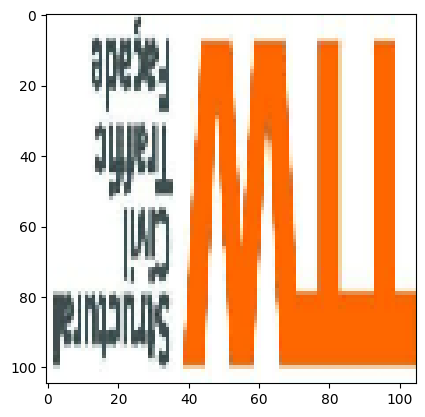

In [ ]:
plt.imshow(example[0])


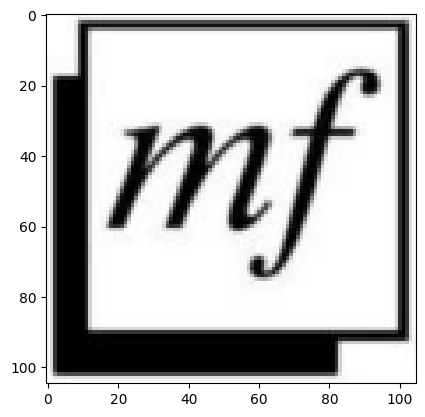

In [ ]:
plt.imshow(example[1])


In [ ]:
example[2]



0.0

In [ ]:
# def preprocess(img_path):
#   byte_img=tf.io.read_file(img_path)
#   img=tf.io.decode_jpeg(byte_img)
#   img=tf.image.resize(img,(105,105))
#   img=img/255.0
#   return img

In [ ]:
# def preprocess_twins(input_img,given_img,label):
#   return ( preprocess(input_img),preprocess(given_img) ,label)

In [ ]:
# (anc , pos)=> 1,1,1,1,1,1....,n
# (anc , neg)=> 0,0,0,0,0,0....,n

In [ ]:
# def preprocess_twins(input_img,given_img,label):
#   return ( preprocess(input_img),preprocess(given_img) ,label)

In [ ]:
# result=preprocess_twins(*example)

In [ ]:
# len(result)

3

In [ ]:
data=dataset_test

In [ ]:
train_data=data.take(round(len(data)*0.8))
train_data=train_data.batch(16)
train_data=train_data.prefetch(8)

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [ ]:
test_data=data.skip(round(len(data)*0.8))
test_data=test_data.take(round(len(data)*0.2))
test_data=test_data.batch(16)
test_data=test_data.prefetch(8)

In [ ]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

# Making Model embeddeding layer

In [ ]:
# inp=Input(shape=(105,105,3), name='input_image')

In [ ]:
# inp

<KerasTensor: shape=(None, 105, 105, 3) dtype=float32 (created by layer 'input_image')>

In [ ]:
# c1=Conv2D(64,(10,10),activation='relu')(inp)

In [ ]:
# c1

<KerasTensor: shape=(None, 96, 96, 64) dtype=float32 (created by layer 'conv2d')>

In [ ]:
# m1=MaxPooling2D(64,(2,2),padding='same')(c1)
# m1

<KerasTensor: shape=(None, 48, 48, 64) dtype=float32 (created by layer 'max_pooling2d')>

In [ ]:
# c2=Conv2D(128,(7,7),activation='relu')(m1)
# c2

<KerasTensor: shape=(None, 42, 42, 128) dtype=float32 (created by layer 'conv2d_1')>

In [ ]:
# m2=MaxPooling2D(64,(2,2),padding='same')(c2)
# m2

<KerasTensor: shape=(None, 21, 21, 128) dtype=float32 (created by layer 'max_pooling2d_1')>

In [ ]:
  # c3=Conv2D(128,(4,4),activation='relu')(m2)
  # c3

<KerasTensor: shape=(None, 18, 18, 128) dtype=float32 (created by layer 'conv2d_2')>

In [ ]:
# m3=MaxPooling2D(64,(2,2),padding='same')(c3)
# m3

<KerasTensor: shape=(None, 9, 9, 128) dtype=float32 (created by layer 'max_pooling2d_2')>

In [ ]:
# c4=Conv2D(256,(4,4),activation='relu')(m3)
# c4

<KerasTensor: shape=(None, 6, 6, 256) dtype=float32 (created by layer 'conv2d_3')>

In [ ]:
# f1=Flatten()(c4)
# f1

<KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten')>

In [ ]:
# d1=Dense(4096,activation='sigmoid')(f1)
# d1

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense')>

In [ ]:
# mod= Model(inputs=[inp] , outputs=[d1] , name='embedding')
# mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 105, 105, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       26

In [ ]:
def make_embeddeding():
  inp=Input(shape=(105,105,3), name='input_image')

  # First Block
  c1=Conv2D(64,(10,10),activation='relu')(inp)
  m1=MaxPooling2D(64,(2,2),padding='same')(c1)

  # Second Block
  c2=Conv2D(128,(7,7),activation='relu')(m1)
  m2=MaxPooling2D(64,(2,2),padding='same')(c2)

  # Third Block
  c3=Conv2D(128,(4,4),activation='relu')(m2)
  m3=MaxPooling2D(64,(2,2),padding='same')(c3)

  # Final Embedding Block
  c4=Conv2D(256,(4,4),activation='relu')(m3)
  f1=Flatten()(c4)
  d1=Dense(4096,activation='sigmoid')(f1)


  return Model(inputs=[inp] , outputs=[d1] , name='embedding')

In [ ]:
embedding=make_embeddeding()
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 105, 105, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       26

# DIstance layer L1 distance

In [4]:
# Build Custom L1 distance Layer
# need tp run this cell even when you reload model
class L1Dist(Layer):
  def __init__(self,**kwargs):
    super().__init__()

  def call(self, input_embeddeding , validation_embeddeding):
    return tf.math.abs(input_embeddeding-validation_embeddeding)


In [5]:
l1=L1Dist()

In [ ]:
input_image=Input(name='input_img',shape=(105,105,3))

validation_image=Input(name='validation_img',shape=(105,105,3))

input_embedding=embedding(input_image)
validation_embedding=embedding(validation_image)

In [ ]:
l1(input_embedding,validation_embedding)

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'l1_dist')>

In [ ]:
def make_siamese_model():
  # Anchor input
  input_image=Input(name='input_img',shape=(105,105,3))

  # validation input
  validation_image=Input(name='validation_img',shape=(105,105,3))

  # combine embedding layer and L1 distance layer
  siamese_layer=L1Dist()
  siamese_layer._name='distance'
  distances=siamese_layer(embedding(input_image),embedding(validation_image))

  # classifier
  classifier=Dense(1,activation='sigmoid')(distances)

  return Model(inputs=[input_image,validation_image],outputs=classifier,name='Siamese_Neural_Network_ammar')

In [ ]:
siamese_model = make_siamese_model()
siamese_model.summary()

Model: "Siamese_Neural_Network_ammar"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'vali

# defining Loss

In [ ]:
binary_cross_loss=tf.losses.BinaryCrossentropy()

In [ ]:
optimizer=tf.keras.optimizers.Adam(1e-4)

# Check point saving

In [ ]:
checkpoint_dir='/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/checkpoints'
checkpoint_prefix=os.path.join(checkpoint_dir,'ckpt')
checkpoint=tf.train.Checkpoint(optimizer=optimizer,siamese_model=siamese_model)

# Train Function

In [ ]:
@tf.function
def train_step(batch):

    # Record all of our operations
    with tf.GradientTape() as tape:
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]

        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)

    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)

    # Calculate updated weights and apply to siamese model
    optimizer.apply_gradients(zip(grad, siamese_model.trainable_variables))

    # Return loss
    return loss

In [ ]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print(f'\n Epoch {epoch}/{epoch}')
        progbar = tf.keras.utils.Progbar(len(data))

        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)

        # Save checkpoints
        if epoch % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
EPOCHS = 40

In [ ]:
train(train_data, EPOCHS)


 Epoch 1/1
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
1035/1035 [==============================] - 954s 908ms/step

 Epoch 2/2
1035/1035 [==============================] - 49s 47ms/step

 Epoch 3/3
1035/1035 [==============================] - 48s 47ms/step

 Epoch 4/4
1035/1035 [==============================] - 48s 46ms/step

 Epoch 5/5
1035/1035 [==============================] - 48s 46ms/step

 Epoch 6/6
1035/1035 [==============================] - 48s 46ms/step

 Epoch 7/7
1035/1035 [==============================] - 48s 46ms/step

 Epoch 8/8
1035/1035 [==============================] - 48s 46ms/step

 Epoch 9/9
1035/1035 [==============================] - 48s 46ms/step

 Epoch 10/10
1035/1035 [==============================] - 48s 46ms/step

 Epoch 11/11
1035/1035 [==============================] - 48s 46ms/step

 Epoch 12/12
1035/1035 [==============================] - 

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [ ]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat_norm=[1 if prediction > 0.5 else 0 for prediction in y_hat ]
y_hat_norm

1/1 [==============================] - 0s 26ms/step


[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [ ]:
y_true

array([0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
      dtype=float32)

In [ ]:
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [ ]:
m = Precision()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0



LABEL:   0


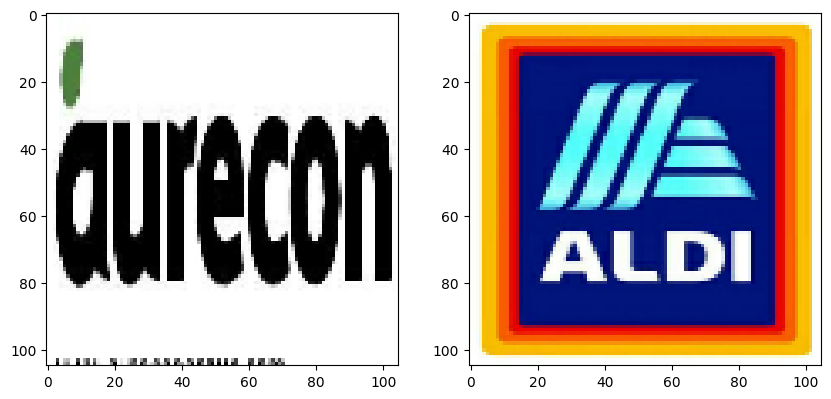



LABEL:   1


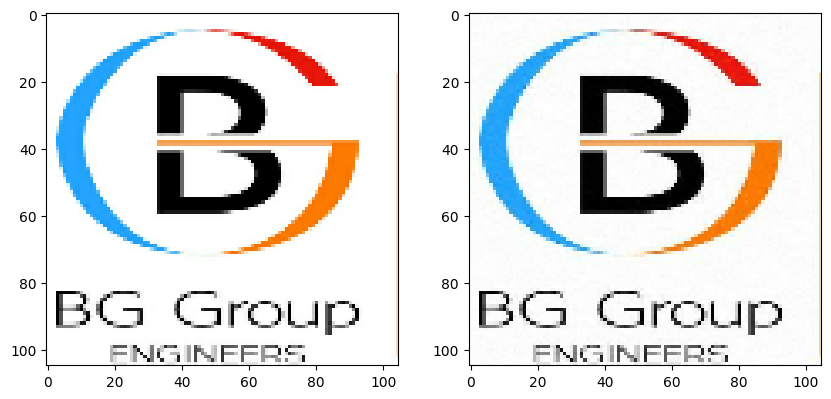



LABEL:   0


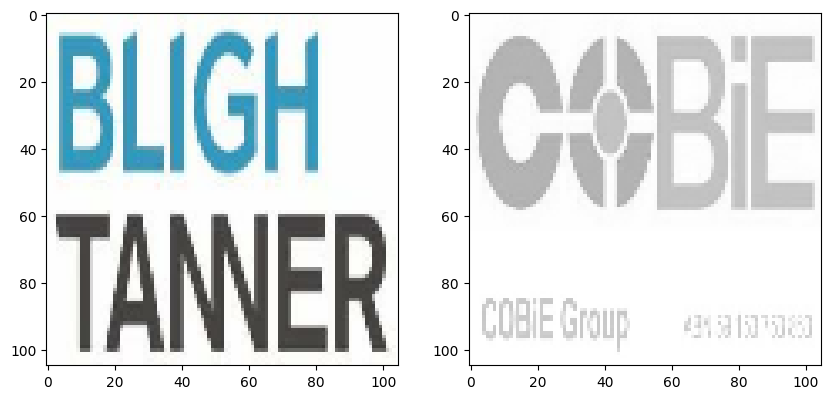



LABEL:   0


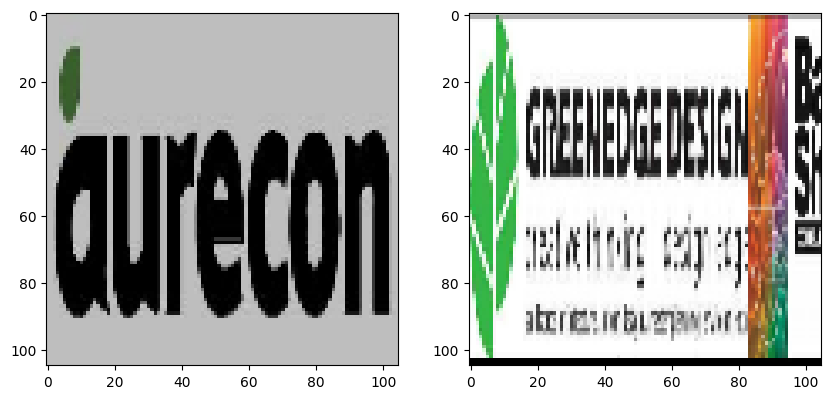



LABEL:   1


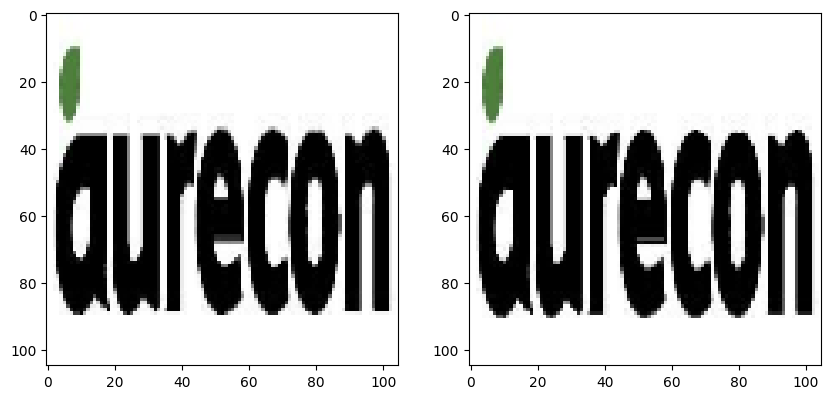



LABEL:   1


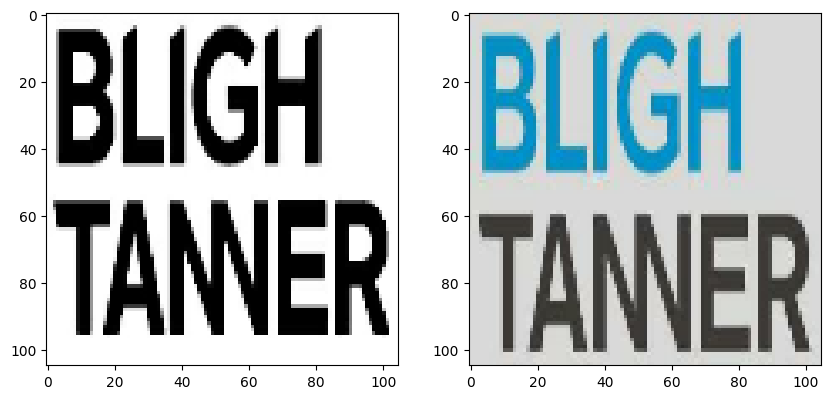



LABEL:   0


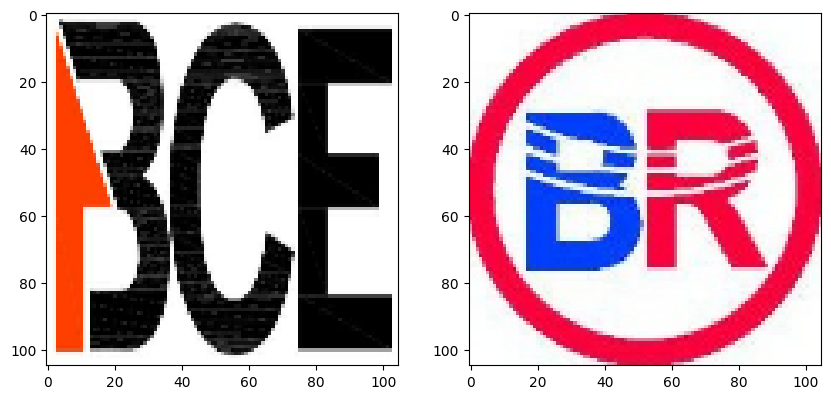



LABEL:   1


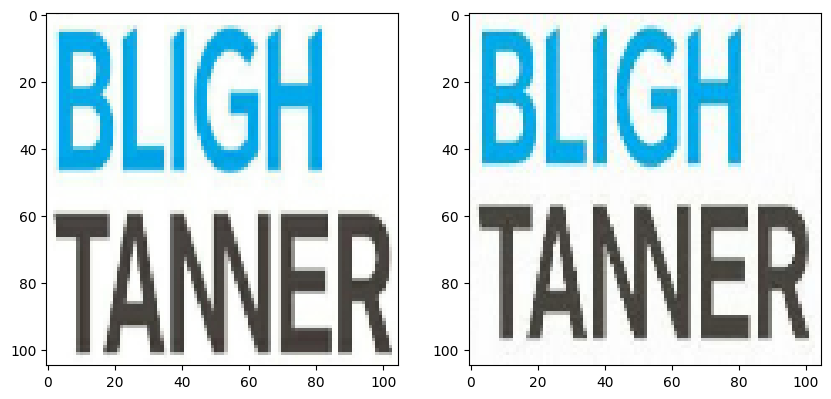



LABEL:   1


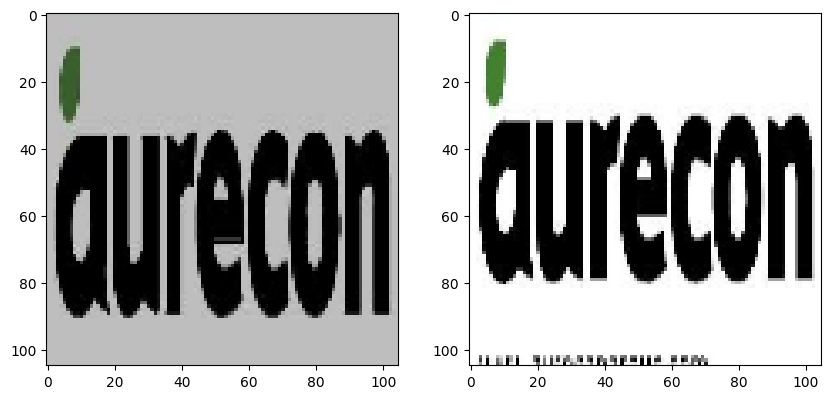



LABEL:   1


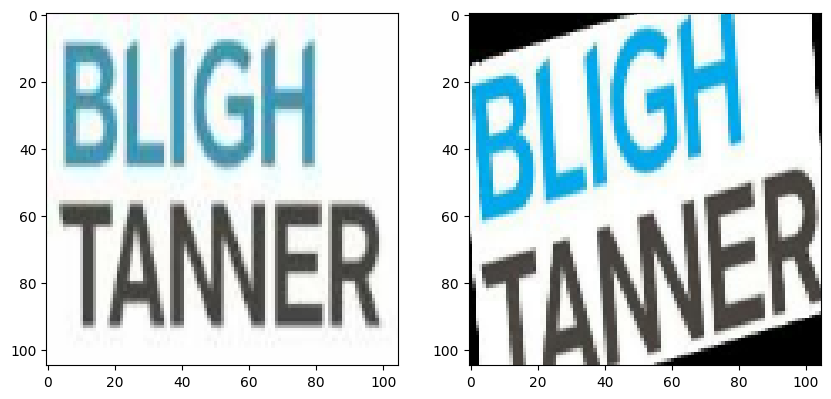



LABEL:   1


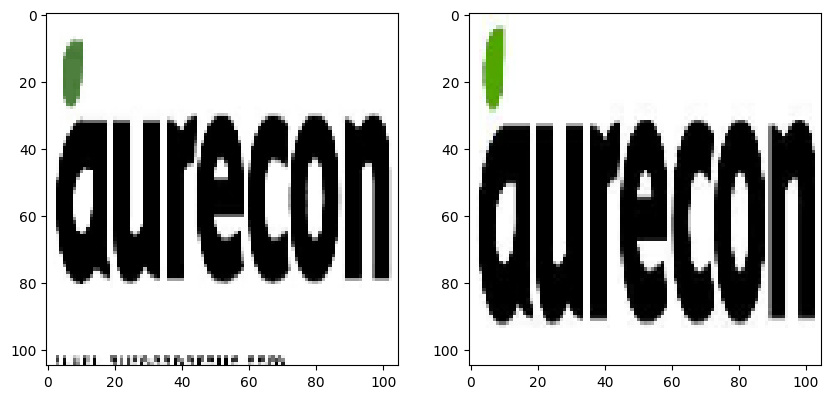



LABEL:   1


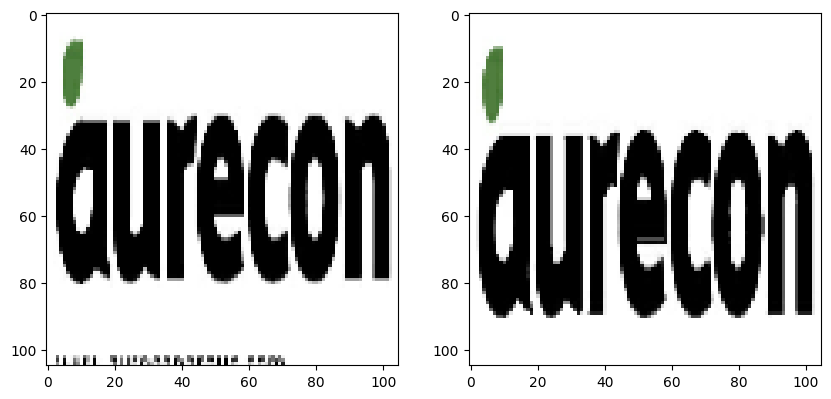



LABEL:   0


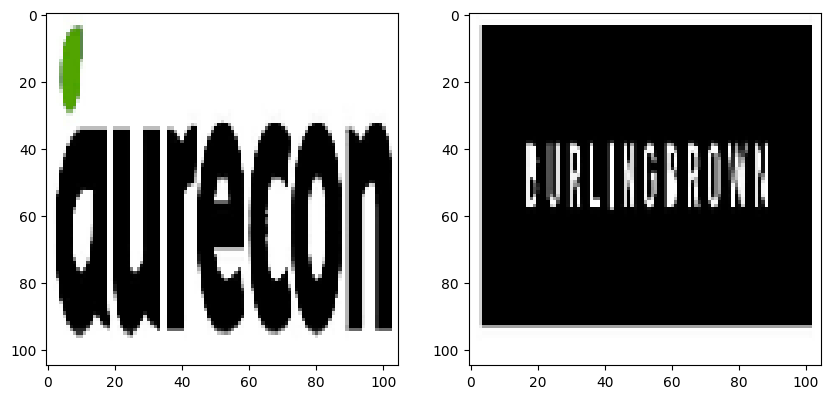



LABEL:   1


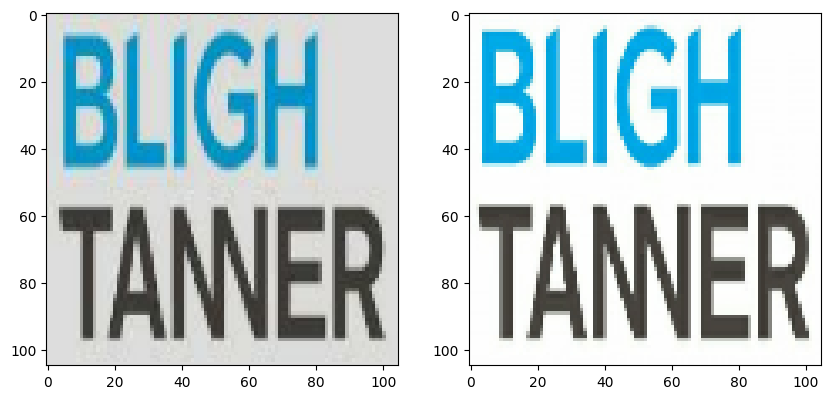



LABEL:   1


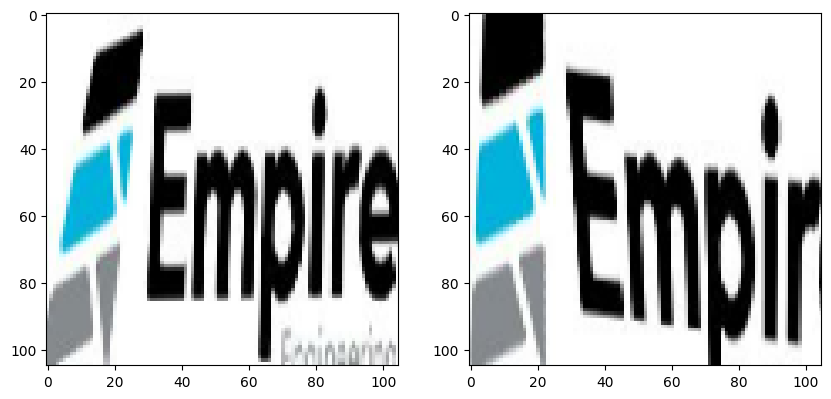



LABEL:   1


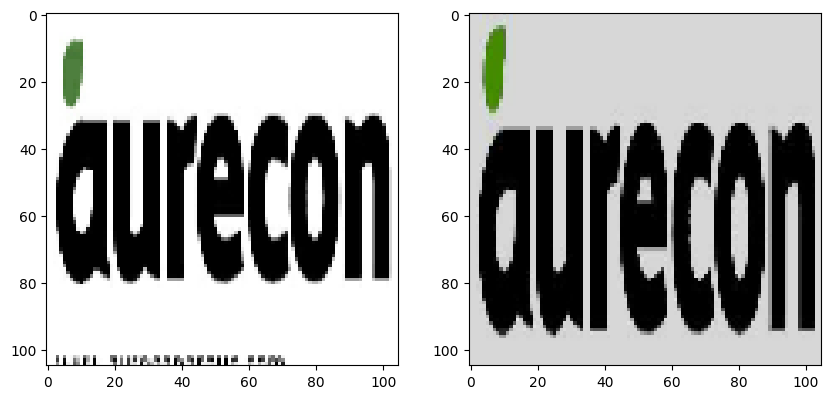

In [ ]:
for idx in range(len(y_hat)):
  # Set plot size
  plt.figure(figsize=(10,8))
  print(f'\n\nLABEL:   {y_hat_norm[idx]}')

  # Set first subplot
  plt.subplot(1,2,1)
  plt.imshow(test_input[idx])

  # Set second subplot
  plt.subplot(1,2,2)
  plt.imshow(test_val[idx])

  # Renders cleanly
  plt.show()


In [ ]:
%cd /content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog

/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog


In [ ]:
# save weights
siamese_model.save('Siamese_Weights_for_logo_Iteration_1.h5')


# Reloading model weights

In [6]:
model= tf.keras.saving.load_model('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/Siamese_Weights_for_logo_Iteration_1.h5' , custom_objects={'L1Dist':L1Dist}) #, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})
#tf.keras.models.load_model

In [ ]:
y_hat_reloaded_model=model.predict([test_input,test_val])

1/1 [==============================] - 0s 127ms/step


In [ ]:
y_hat_reloaded_model_norm=[1 if prediction > 0.5 else 0 for prediction in y_hat ]
y_hat_reloaded_model_norm

[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [ ]:
y_true

array([0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
      dtype=float32)

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [7]:
# take three image pairs per consultants and calculate val scores

def make_validation_dataset(anchor_path,positive_path,negative_path):


  def preprocess_val(img_path):
    byte_img=tf.io.read_file(img_path)
    img=tf.io.decode_jpeg(byte_img)
    img=tf.image.resize(img,(105,105))
    img=img/255.0
    return img

  def preprocess_twins_val(input_img,given_img,label):
    return ( preprocess_val(input_img),preprocess_val(given_img) ,label)

  # val=len(os.listdir(anchor_path))
  val=3

  anchor=tf.data.Dataset.list_files(anchor_path+'/*.jpg' , shuffle=True).take(val)
  positive=tf.data.Dataset.list_files(positive_path+'/*.jpg', shuffle=True).take(val)
  negative=tf.data.Dataset.list_files(negative_path+'/*.jpg', shuffle=True).take(val)


  positives=tf.data.Dataset.zip((anchor , positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
  negatives=tf.data.Dataset.zip((anchor , negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))


  data=positives.concatenate(negatives)

  data=data.map(preprocess_twins_val)
  data=data.cache()
  data=data.shuffle(buffer_size=1024)


  return data


In [8]:
def multiple_validation_dataset_merge(directories_list):
  data=tf.data.Dataset.from_tensors([])
  modified = False
  for idx, dir in enumerate(directories_list):
    if not modified:
      dir_anc_path=os.path.join(dir,'anchor')
      dir_pos_path=os.path.join(dir,'positive')
      dir_neg_path=os.path.join(dir,'negative')

      if not ((os.path.exists(dir_anc_path) and os.path.exists(dir_pos_path)) and os.path.exists(dir_neg_path)):
        print(f"\nDirectory {dir} doesnt have valid anchor, positive or negative folders......Please Check\n")
        continue
      else:
      #   print(dir_anc_path)
      #   print(dir_pos_path)
      #   print(dir_neg_path)
        data=make_validation_dataset(dir_anc_path,dir_pos_path,dir_neg_path)
        modified = True
        print("first iter")
    else:
      dir_anc_path=os.path.join(dir,'anchor')
      dir_pos_path=os.path.join(dir,'positive')
      dir_neg_path=os.path.join(dir,'negative')

      if not ((os.path.exists(dir_anc_path) and os.path.exists(dir_pos_path)) and os.path.exists(dir_neg_path)):
        print(f"\nDirectory {dir} doesnt have valid anchor, positive or negative folders......Please Check\n")
        continue
      else:
      #   print(dir_anc_path)
      #   print(dir_pos_path)
      #   print(dir_neg_path)
        dataset_conc=make_validation_dataset(dir_anc_path,dir_pos_path,dir_neg_path)
        # data=data.shuffle(buffer_size=1024)
        data=data.concatenate(dataset_conc.shuffle(buffer_size=1024))

        print("Successful rest iter")

  return data




In [9]:
dir=os.listdir('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation')
dir.remove('zzz_unknowns_not_consultants')
len(dir) , dir

(134,
 ['vt_consulting',
  'wga',
  'volcon',
  'wsp.jpg',
  'westera_partners.jpg',
  'wright_design.jpg',
  'van_der_meer',
  'woolacotts.jpg',
  'wood_and_grieve_engineers',
  'terpkos',
  'structure_studio',
  'ttw',
  'triaxial.jpg',
  'tungsten',
  'stp.jpg',
  'structplan',
  'structa',
  'structural_arts',
  'tonkin.jpg',
  'sheehy.jpg',
  'scg',
  'rmg',
  'sticksstones.jpg',
  'roofbrook.jpg',
  'sia_structural',
  'robert_bird_group.jpg',
  'stantec.jpg',
  'rma.jpg',
  'sge.jpg',
  'rba.jpg',
  'peter_lucena',
  'projects_and_designs.jpg',
  'Pritchard.jpg',
  'parkhill_freeman',
  'pt_design.jpg',
  'richmond_ross',
  'push_tod',
  'patcol.jpg',
  'reid.jpg',
  'northrop.jpg',
  'olia',
  'opus',
  'northey_consulting_engineers',
  'ops_engineers',
  'oska.jpg',
  'optimum_structures.jpg',
  'naxos',
  'northern_consulting_engineers',
  'odyssey',
  'motus.jpg',
  'mlei.jpg',
  'mott_mcdonald',
  'nastasi',
  'mrc',
  'morgan_consulting_engineers.jpg',
  'mpn.jpg',
  'mpc.

In [10]:
dir_path=[]
for folder in dir:
  dir_path.append(os.path.join('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation',folder))
  if not os.path.exists(os.path.join('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation',folder)):
    print(os.path.join('/content/gdrive/MyDrive/MetaMorphix/siamese_nn_for_logo_recog/consultant_wise_segregation',folder))



In [11]:
dataset_test=multiple_validation_dataset_merge(dir_path)

first iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Successful rest iter
Su

In [12]:
dataset_val=dataset_test
len(dataset_val)

792

In [13]:
# test_data=dataset_test.skip(round(len(data)*0.8))
val_data=dataset_val.take(round(len(dataset_val)*1.0))
val_data=val_data.batch(len(dataset_val))
val_data=val_data.prefetch(len(dataset_val))

In [14]:
val_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [15]:
val_input, val_val, y_true = val_data.as_numpy_iterator().next()

In [16]:
y_hat_val = model.predict([val_input, val_val])
# y_hat_norm=[1 if prediction > 0.5 else 0 for prediction in y_hat_val ]
# y_hat_norm
y_hat_val

25/25 [==============================] - 9s 52ms/step


array([[9.97637192e-17],
       [4.75530624e-06],
       [9.79907751e-01],
       [9.91330266e-01],
       [9.87274170e-01],
       [6.04287095e-07],
       [9.37458992e-01],
       [2.18632068e-09],
       [9.86623347e-01],
       [9.44486737e-01],
       [9.80151249e-09],
       [1.76957735e-06],
       [4.19030296e-16],
       [9.61711764e-01],
       [9.96189535e-01],
       [9.17361856e-01],
       [1.19023183e-02],
       [1.94928710e-18],
       [9.87777293e-01],
       [1.74108221e-25],
       [9.30147827e-01],
       [6.60709439e-18],
       [1.98064729e-08],
       [9.99319911e-01],
       [9.14331436e-01],
       [9.96014237e-01],
       [2.05253151e-23],
       [8.45340014e-01],
       [4.45834342e-12],
       [3.07413018e-07],
       [9.99602377e-01],
       [7.66656250e-09],
       [7.53945589e-01],
       [5.97535259e-12],
       [2.29009714e-15],
       [9.99981403e-01],
       [1.72292057e-05],
       [9.99799788e-01],
       [7.14566708e-01],
       [6.57313819e-07],


In [17]:
y_true

array([0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1.

In [42]:
from tensorflow.keras.metrics import Precision, Recall , Accuracy ,TruePositives

In [37]:
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat_val)

# Return Recall Result
m.result().numpy()

0.9191919

In [38]:
p = Precision()

# Calculating the recall value
p.update_state(y_true, y_hat_val)

# Return Recall Result
p.result().numpy()

0.9655172

In [40]:
# accuracy is zero since y_true has only two labels 0 and 1 whereas y_hat has values ranging from 0.0 to 0.1
a = Accuracy()

# Calculating the recall value
a.update_state(y_true, y_hat_val)

# Return Recall Result
a.result().numpy()

0.0

In [43]:
t = TruePositives()

# Calculating the recall value
t.update_state(y_true, y_hat_val)

# Return Recall Result
t.result().numpy()

364.0

In [18]:
confidence_list = y_hat_val
range_dict = {}

for i, confidence in enumerate(confidence_list):
    # Determine the range bucket for the current confidence value
    bucket = int(confidence * 10)  # Multiply by 10 to get a bucket index from 0 to 9

    # Create a range tuple for the bucket
    confidence_range = (bucket / 10, (bucket + 1) / 10)

    # Add the index to the corresponding range in the dictionary
    if confidence_range in range_dict:
        range_dict[confidence_range].append(i)
    else:
        range_dict[confidence_range] = [i]

# Print the dictionary
for key, value in range_dict.items():
    print(f"Range {key}: {value}")


Range (0.0, 0.1): [0, 1, 5, 7, 10, 11, 12, 16, 17, 19, 21, 22, 26, 28, 29, 31, 33, 34, 36, 39, 40, 42, 43, 46, 48, 52, 53, 54, 55, 56, 60, 63, 64, 66, 69, 70, 72, 73, 77, 81, 83, 86, 88, 89, 90, 94, 95, 97, 98, 99, 100, 102, 105, 106, 110, 112, 113, 116, 117, 119, 120, 121, 127, 131, 133, 135, 138, 141, 143, 144, 148, 149, 151, 154, 158, 159, 165, 166, 168, 169, 171, 176, 178, 179, 180, 183, 184, 186, 188, 191, 192, 193, 194, 199, 201, 202, 204, 205, 208, 209, 213, 214, 215, 217, 220, 221, 223, 226, 227, 228, 232, 233, 235, 236, 238, 240, 243, 244, 248, 251, 252, 255, 257, 259, 261, 262, 266, 267, 270, 272, 274, 278, 279, 280, 282, 283, 284, 285, 288, 289, 290, 296, 297, 300, 301, 307, 308, 309, 312, 314, 315, 317, 319, 320, 323, 324, 325, 327, 328, 329, 332, 334, 338, 339, 340, 343, 345, 346, 349, 351, 353, 356, 357, 359, 360, 363, 364, 365, 366, 372, 374, 375, 377, 378, 383, 385, 387, 392, 394, 398, 401, 402, 406, 409, 411, 414, 415, 416, 418, 423, 424, 425, 429, 430, 431, 436, 439, 

In [20]:
myKeys = list(range_dict.keys())
myKeys.sort()
sorted_dict = {i: range_dict[i] for i in myKeys}

print(sorted_dict)

{(0.0, 0.1): [0, 1, 5, 7, 10, 11, 12, 16, 17, 19, 21, 22, 26, 28, 29, 31, 33, 34, 36, 39, 40, 42, 43, 46, 48, 52, 53, 54, 55, 56, 60, 63, 64, 66, 69, 70, 72, 73, 77, 81, 83, 86, 88, 89, 90, 94, 95, 97, 98, 99, 100, 102, 105, 106, 110, 112, 113, 116, 117, 119, 120, 121, 127, 131, 133, 135, 138, 141, 143, 144, 148, 149, 151, 154, 158, 159, 165, 166, 168, 169, 171, 176, 178, 179, 180, 183, 184, 186, 188, 191, 192, 193, 194, 199, 201, 202, 204, 205, 208, 209, 213, 214, 215, 217, 220, 221, 223, 226, 227, 228, 232, 233, 235, 236, 238, 240, 243, 244, 248, 251, 252, 255, 257, 259, 261, 262, 266, 267, 270, 272, 274, 278, 279, 280, 282, 283, 284, 285, 288, 289, 290, 296, 297, 300, 301, 307, 308, 309, 312, 314, 315, 317, 319, 320, 323, 324, 325, 327, 328, 329, 332, 334, 338, 339, 340, 343, 345, 346, 349, 351, 353, 356, 357, 359, 360, 363, 364, 365, 366, 372, 374, 375, 377, 378, 383, 385, 387, 392, 394, 398, 401, 402, 406, 409, 411, 414, 415, 416, 418, 423, 424, 425, 429, 430, 431, 436, 439, 441, 

In [2]:
# Print the dictionary
for key, value in sorted_dict.items():
    print(f"Range {key}: {value}")

NameError: ignored

In [1]:
def return_conf_range_values(idx_list,y_val,y_hat):


  pass

# sorted_dict[(0.7, 0.8)]

for keyy in sorted_dict.keys():
  for idx in sorted_dict[keyy]:
    y_val_conf_range_0_8_0_9=[]
    y_hat_conf_range_0_8_0_9=[]
    # print(y_hat_val[idx] ,"--------------------", y_true[idx])
    # print()
    y_val_conf_range.append(y_hat_val[idx])
    y_hat_conf_range.append(y_true[idx])

    m = Recall()

    # Calculating the recall value
    m.update_state(y_true, y_hat_val)

    # Return Recall Result
    recall=m.result().numpy()

    p = Precision()

    # Calculating the recall value
    p.update_state(y_true, y_hat_val)

    # Return Recall Result
    precision=p.result().numpy()
    print(f"Range {keyy} : Recall {recall}   Precision {precision}")
    # print(recall,precision)


  break



NameError: ignored